In [1]:
import numpy as np
from utils.logistic_map_utils import logistic_map, get_fixed_points
from utils.iter_utils import iterate
from utils.plot_utils import *
import matplotlib.pyplot as plt

init_darkmode()

# Dynamical systems, iterated maps and their trajectories

A `dynamical system` is a model describing the evolution of an object over time. Using discrete timesteps, the objects temporal evolution is defined by a `rule` or `map` describing the state of the object from time $t$ to time $t+1$. Repeatedly applying a map to an object is called a `iterated map`.

The basic idea of a `iterated map` is to take a number $x_0$ for $t=0$, the `initial condition`, and then in a sequence of $n$ steps to update this number according to a fixed rule or map to obtain a `trajectory`.



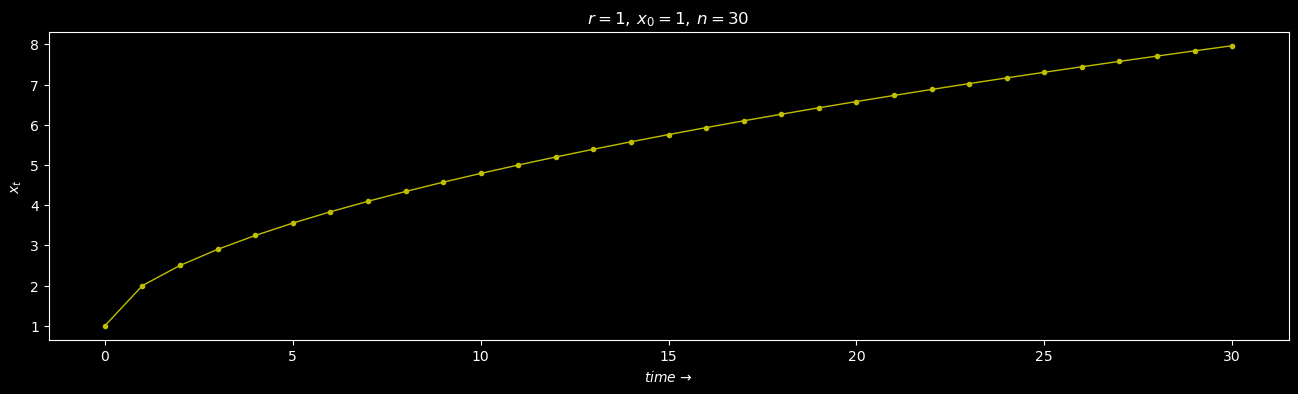

In [2]:
def map(r, x):
    return x+1/(x*r)

t = iterate(map, r=1, x0=1, n=30)
plot_trajectory(t)

When the initial conditions $x_{0}$ are slightly different, say $1$, $2$ or $3$, the trajectories tend to be slightly different as well.

Think of the weather. If the temperature in the morning is a little higher, arond noon it is also expected to be a little higher. Small changes in initial conditions produced small changes in long-term outcome. Predictable, right?

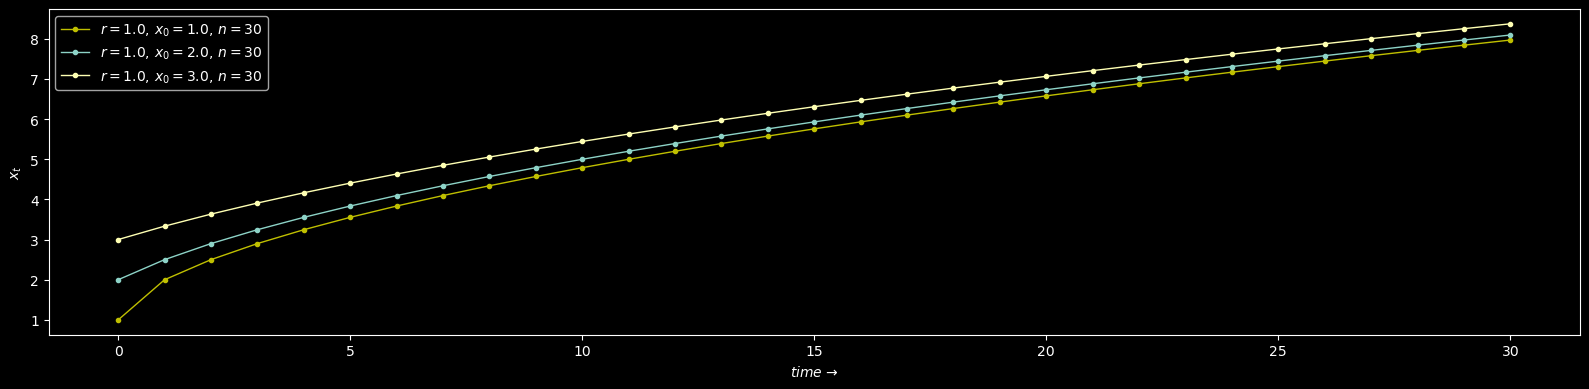

In [3]:
trajectories = iterate(map, r=1, x0=[1,2,3], n=30)
plot_trajectories(trajectories)

Wrong! When modeling the weather in the 1960s, `Edwad Lorenz` discovered by accident that tiny changes in initial conditions - using $0.506127$ vs $0.506$ - yielded completely different weather predictions. The consensus at that time would have been that tiny initial differences should have no practical effect. However, Lorenz discovered that small changes in initial conditions produced large changes in long-term outcome.

Lets demonstrate this with the `logistic map` model.

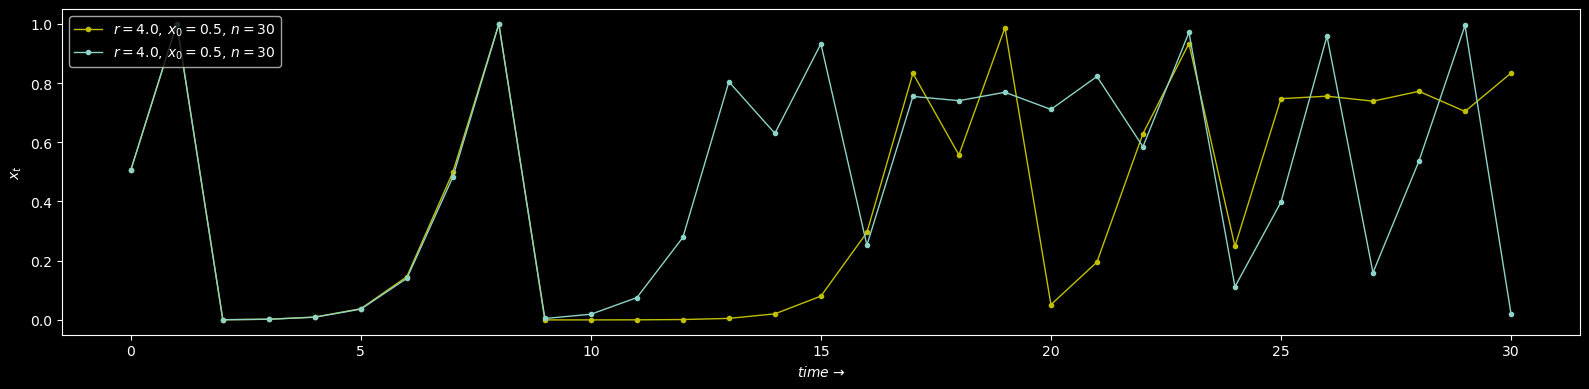

In [4]:
trajectories = iterate(logistic_map, r=4, x0=[0.506127, 0.506], n=30)
plot_trajectories(trajectories)

After $10$ iterations, we see the two simulations diverge into very different trajectories. This is what Lorenz called `deterministic chaos`.

His discovery of deterministic chaos profoundly influenced a wide range of basic sciences and brought about one of the most dramatic changes in mankind's view of nature since Sir Isaac Newton.

It led to the conclusion that it may be fundamentally impossible to predict weather beyond two or three weeks with a reasonable degree of accuracy. However, the recognition of chaos has led to improvements in weather forecasting, as now forecasters recognize that measurements are imperfect and thus run many simulations starting from slightly different conditions, called `ensemble forecasting`.

Lets have a closer look at the logistic map.

## Logistic map

The `logistic map` is an archetypal example of how complex, chaotic behaviour can arise from very simple non-linear dynamical equations. It originates from a 1976 paper by the biologist Robert May as a discrete-time demographic model. The term `logistic` is derived from the Ancient Greek `λόγος`: `logos` (ratio, proportion, reckoning) and refers to the calculation of `proportion` or ratio of existing population to the maximum possible population. It *maps* the population ratio $x_n$ at any time step $n$ to its ratio at the next time step $n+1$. Mathematically, the logistic map is written:

$$x_{n+1} = r x_{n} (1 - x_{n})$$

where $x_{n}$ is a number between $0$ and $1$ (the `proportion` with respect to the maximum possible population) and $r$ is the reproduction rate. This nonlinear difference equation is intended to capture two effects:
- *reproduction* (growth rate) where the population will increase at a rate proportional to the current population when the population size is small: $r * x$, for example: $$logistic\_map(r=3.5, x=0.01) = 0.03465$$
- *starvation* (density-dependent mortality) where the growth rate will decrease at a rate proportional to the theoretical "carrying capacity" of the environment less the current population: $(1 - x_{n})$, for example: $$logistic\_map(r=3.5, x=0.99) = 0.03465$$

Lets look at the longer term trajectories for both $x_{0}=0.01$ and $x_{0}=0.99$

2


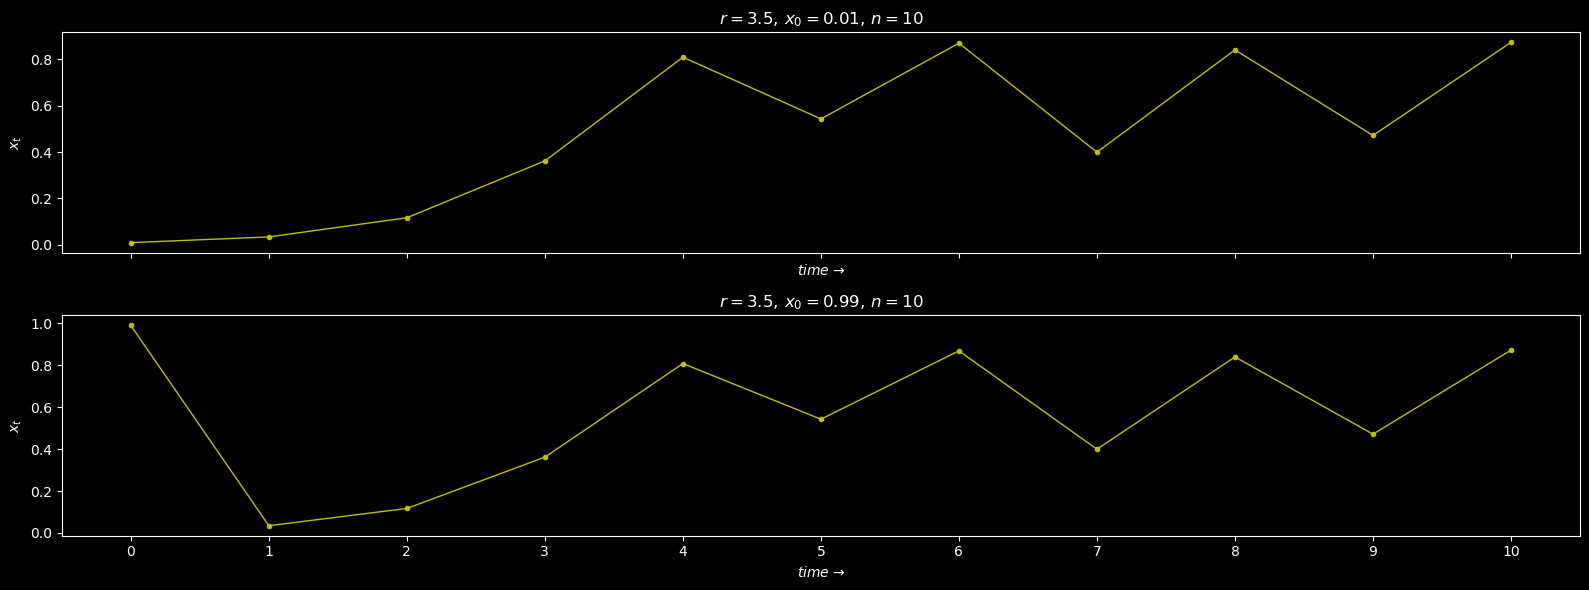

In [5]:
r = 3.5
x0s = [0.01, 0.99]
n=10

fig, axes = plt.subplots(len(x0s), 1, figsize=(16, 3*len(x0s)), sharex=True)
print(len(axes))
for i, ax in enumerate(axes):
    t = iterate(logistic_map, r, x0s[i], n)
    plot_trajectory(t, ax=ax, labels=True)
fig.tight_layout()

Exept for the initial condition $x_{t0}$ the trajectories are exactly the same. We can use a cobweb plot to analyse this. 


### Cobweb plot

A `cobweb plot`, or Verhulst diagram is a visual tool used in the dynamical systems field of mathematics to investigate the qualitative behaviour of one-dimensional iterated functions, such as the logistic map. Using a cobweb plot, it is possible to infer the long term status of an initial condition under repeated application of a map.

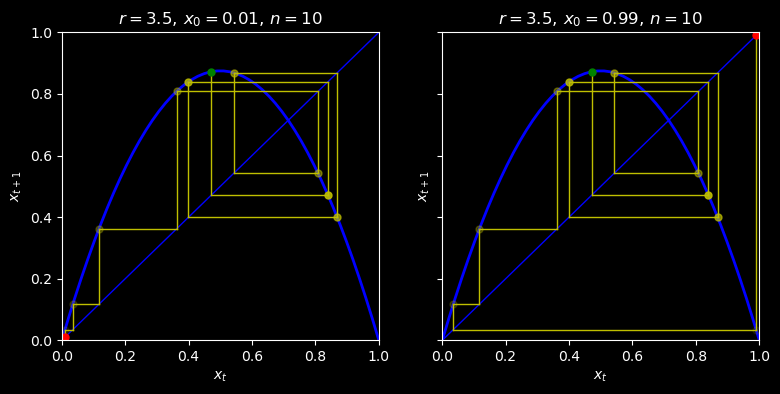

In [6]:
r = 3.5
x0s = [0.01, 0.99]
n=10

fig, axes = plt.subplots(1, len(x0s), figsize=(9, 4), sharey=True)
for i, ax in enumerate(axes):
    t = iterate(logistic_map, r, x0s[i], n=10)
    plot_cobweb(logistic_map, t, ax)


The cobweb plot shows the mapping in blue and the trajectory of, in this case $n=10$ steps in yellow lines, where 🔴 is the initial condition $x_0$, 🟢 is the end state of $x_{t=10}$ and 🟡 the states of $x$ in between.

Combining a trajectory and a cobweb plot visualises clearly what the long term behavior of the system is. Here we will see the system converging to a `equilibrium point`, a constant solution to a differential equation. 

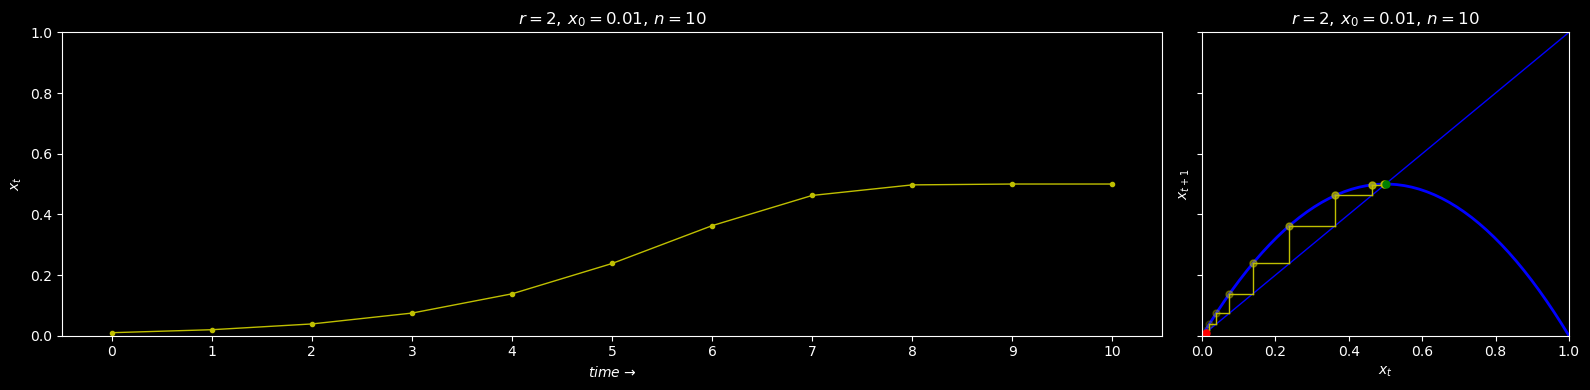

In [7]:
r = 2.0
x0 = 0.01
n=10

t = iterate(logistic_map, r, x0, n)
plot_trajectory_and_cobweb(logistic_map, t)

## Chaotic dynamical systems

A `chaotic dynamical system` is highly sensitive to initial conditions; small perturbations at any given time yield completely different *trajectories*. The trajectories of a chaotic system tend to have complex and unpredictable behaviors.

Many real-world phenomena are chaotic, particularly those that involve nonlinear interactions among many agents (complex systems). Examples can be found in meteorology, economics, biology, and other disciplines.

In this recipe, we will continue simulating a famous chaotic system: the logistic map. We will show the possible long-term behaviors:
- `stable fixed point`,
- `periodic orbits`, and
- `chaotic attractors`

Next, we will draw the system's `bifurcation diagram`, another visual tool to analyse the possible long-term behaviors a function of the system's parameter. We will also compute an approximation of the system's `Lyapunov exponent`, characterizing the model's sensitivity to initial conditions.

### Stable fixed points
A stable fixed point of a map is an element of the domain of that map that `maps to itself`. In our case, using only *variable* $x$ and *parameter* $r$, it is where the $x$ maps to itself:

$$map(r, x) = x$$

The `logistic map` variable $x$ maps to itself when $x = r x (1 - x)$ which is this given by solving $rx^2+x(1-r) = 0$

##### Quicky approach $0.0$

- With $0 \leq r \leq 1$, the population will eventually die, independent of the initial population.

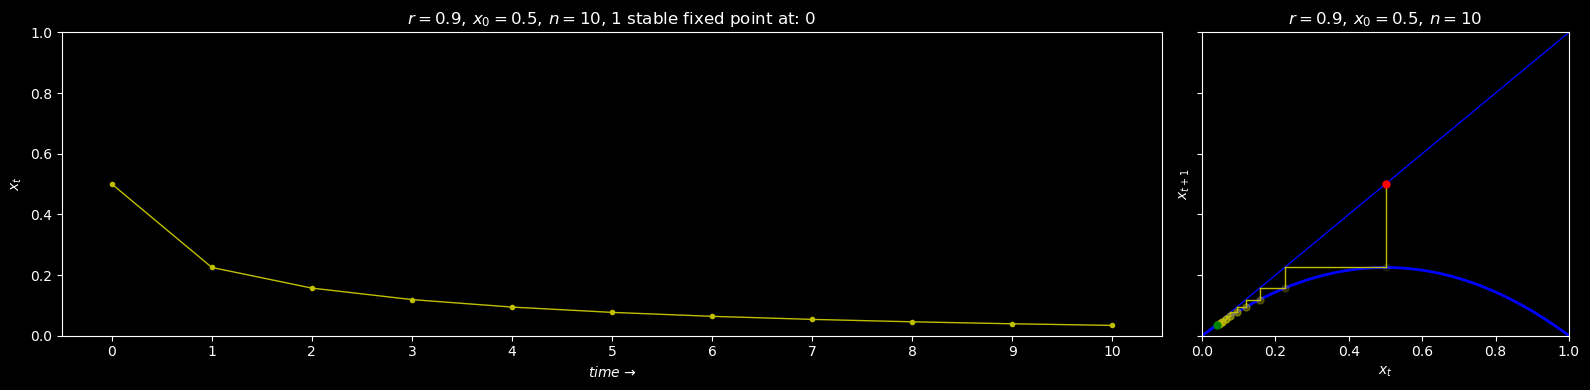

In [8]:
r = 0.9
t = iterate(logistic_map, r, x0=0.5, n=10)
plot_trajectory_and_cobweb(logistic_map, t, fp=get_fixed_points(r))

### Periodic orbits of 2, 4, 8 and 16

### Chaotic trajecotries

### More periodic orbits, of 3, 6, 12

# System long term behavior

By varying the parameter $r$, the following behavior is observed.

## Stable fixed points
### Quicky approach $0.0$

- With $0 \leq r \leq 1$, the population will eventually die, independent of the initial population.
- With $1 < r \leq 2$, the population will quickly approach the value $\dfrac{r−1}{r}$, independent of the initial population.
- With $2 < r \leq 3$, the population will also eventually approach the same value $\dfrac{r−1}{r}$, but first will fluctuate around that value for some time. The rate of convergence is linear, except for $r=3$, when it is dramatically slow, less than linear (see [Bifurcation memory](https://en.wikipedia.org/wiki/Bifurcation_memory)).
- With $3 < r \lesssim 3.44949 \,\, (1+\sqrt 6)$ the population will approach permanent oscillations between 
`2` values. These two values are dependent on $r$ and given by <div style="white-space: pre-wrap;">$x\pm=\dfrac{1}{2r}(r+1\pm\sqrt{(r-3)(r+1)})$</div>
- With $3.44949 < r \lesssim 3.54409$ (approximately), from almost all initial conditions the population will approach permanent oscillations among `4` values.
- With $3.54409 < r \lesssim 3.56995$, from almost all initial conditions the population will approach oscillations among `8` values, then `16`, `32`, etc. The lengths of the parameter intervals that yield oscillations of a given length decrease rapidly; the ratio between the lengths of two successive bifurcation intervals approaches the Feigenbaum constant $δ\approx 4.66920$. This behavior is an example of a [period-doubling cascade](https://en.wikipedia.org/wiki/Period-doubling_bifurcation).
- Most values of $r > 3.56995$ exhibit chaotic behaviour, but there are still certain isolated ranges of r that show non-chaotic behavior; these are sometimes called `islands of stability`. For instance, beginning at $1 + \sqrt8$ ($\approx 3.82843$) there is a range of parameters $r$ that show oscillation among `3` values, and for slightly higher values of $r$ oscillation among `6` values, then `12` etc.

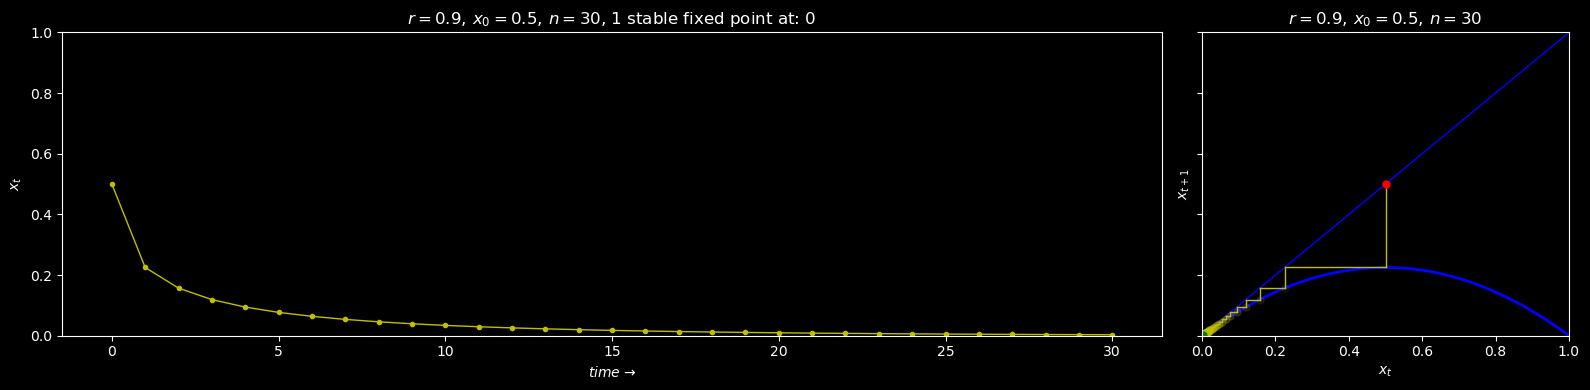

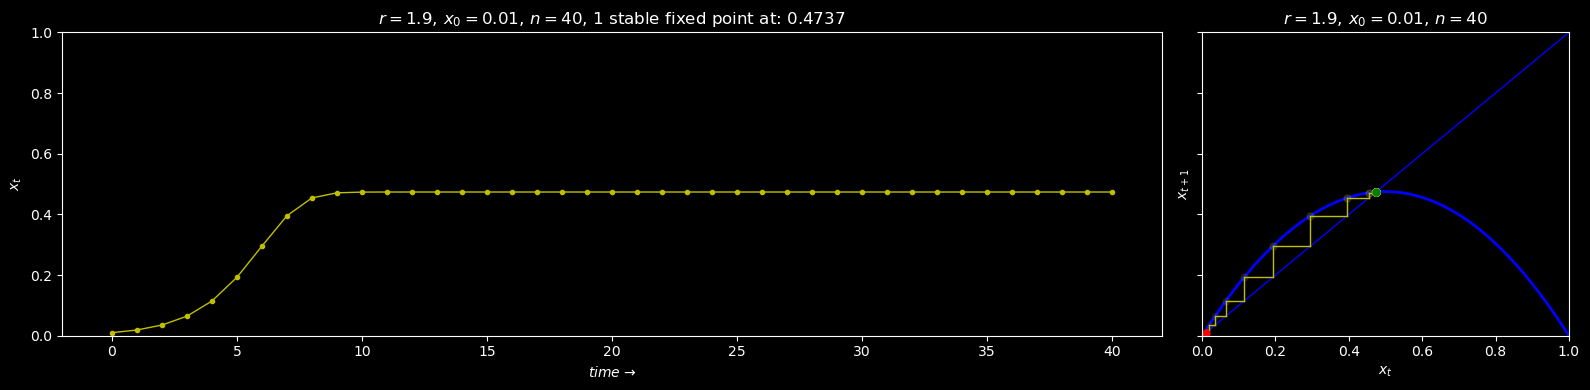

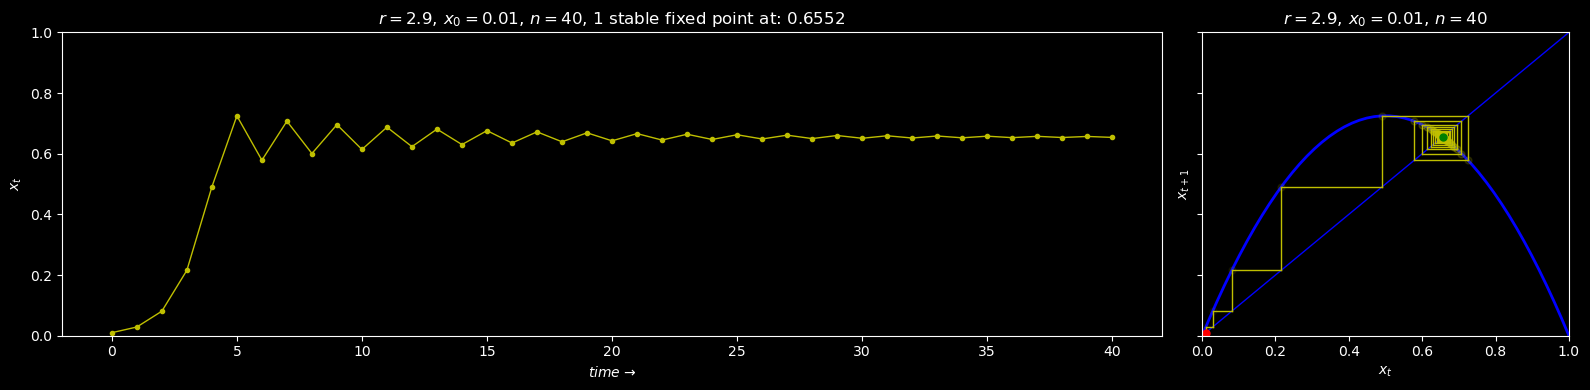

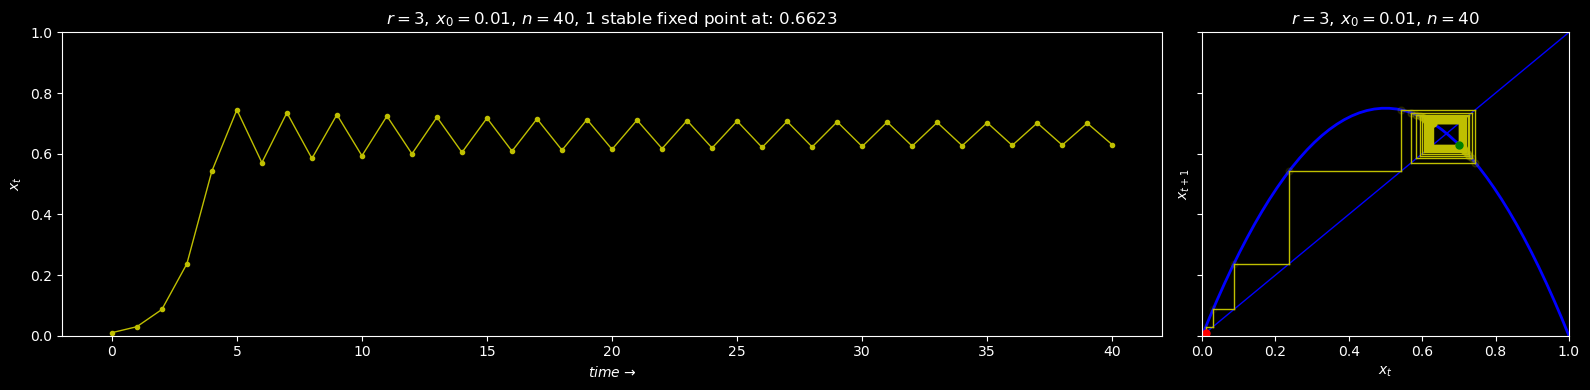

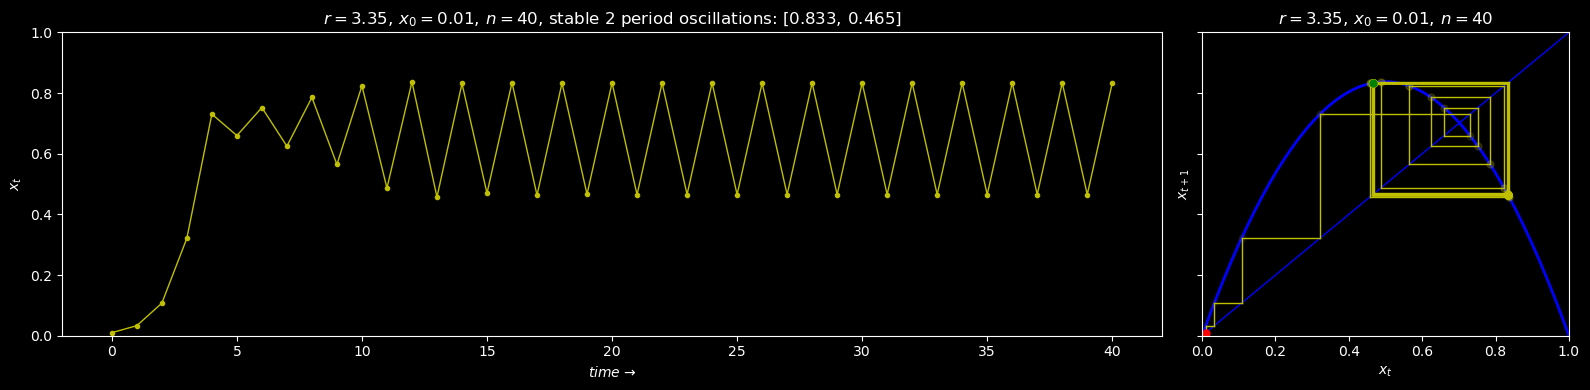

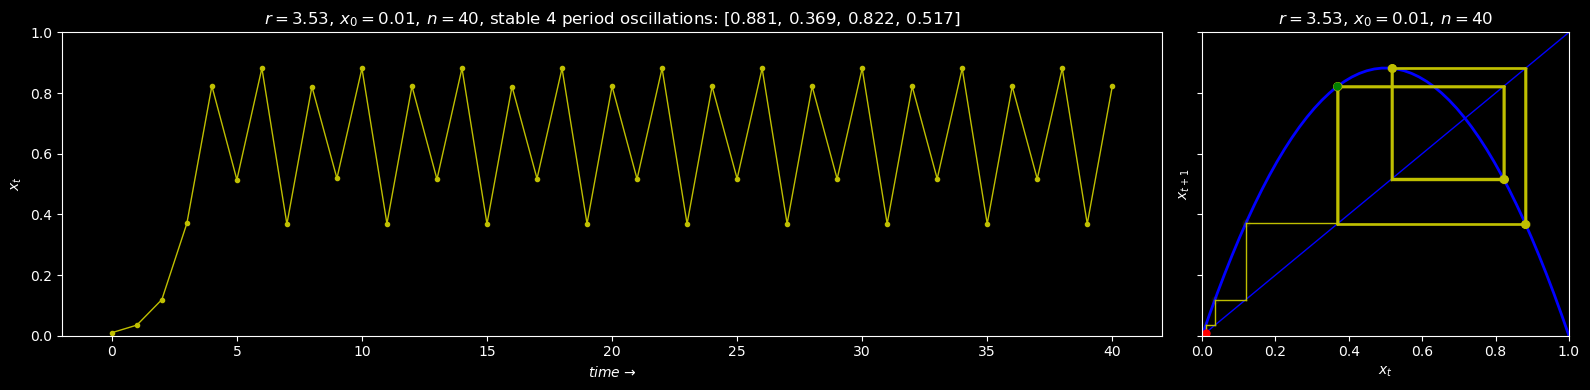

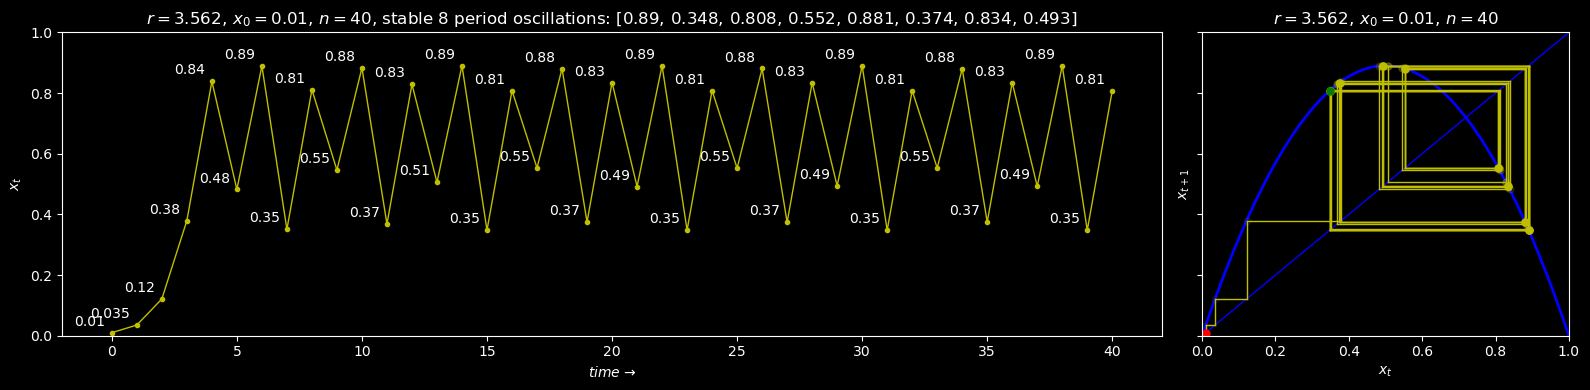

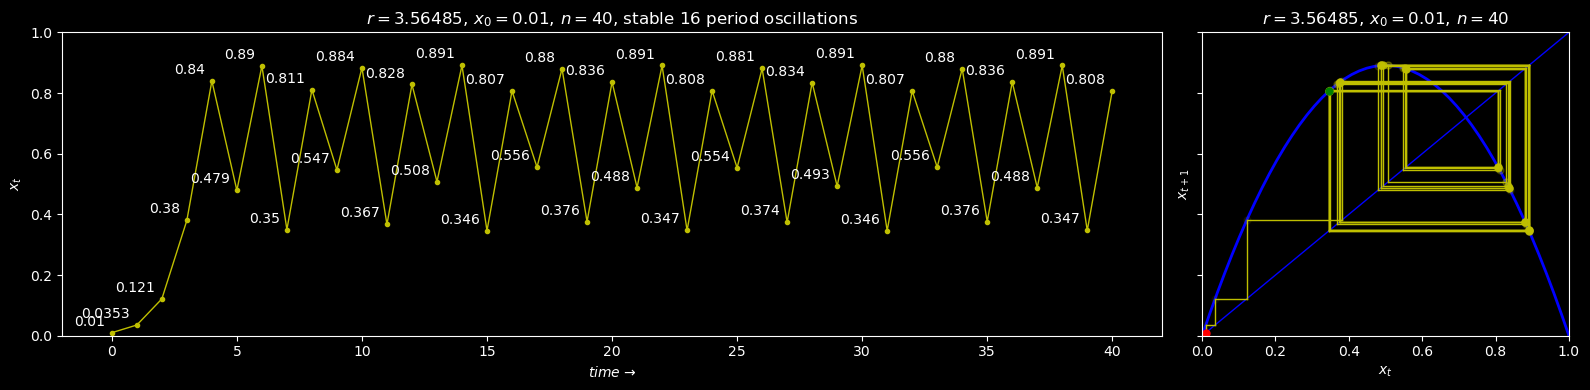

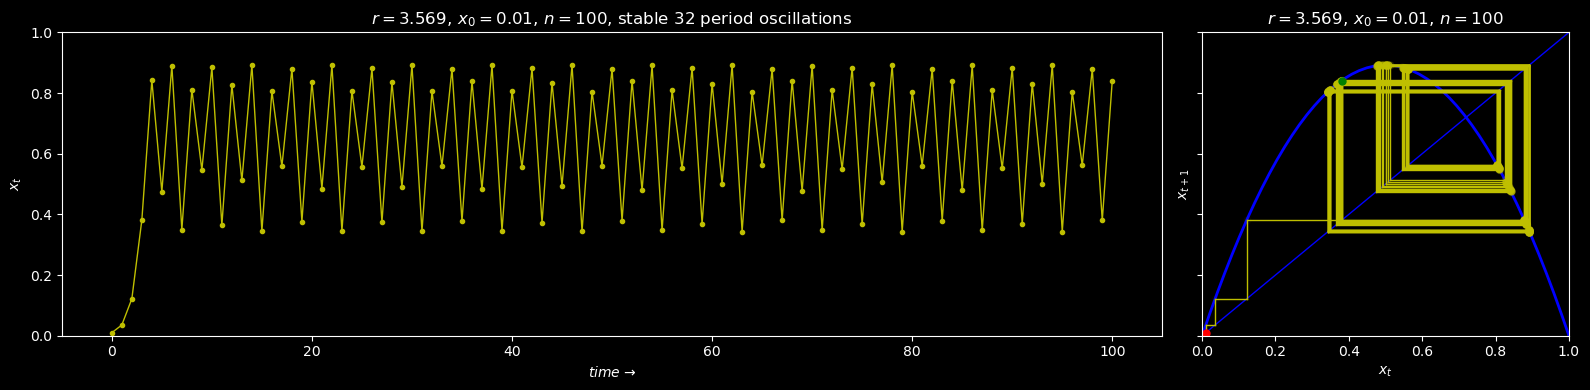

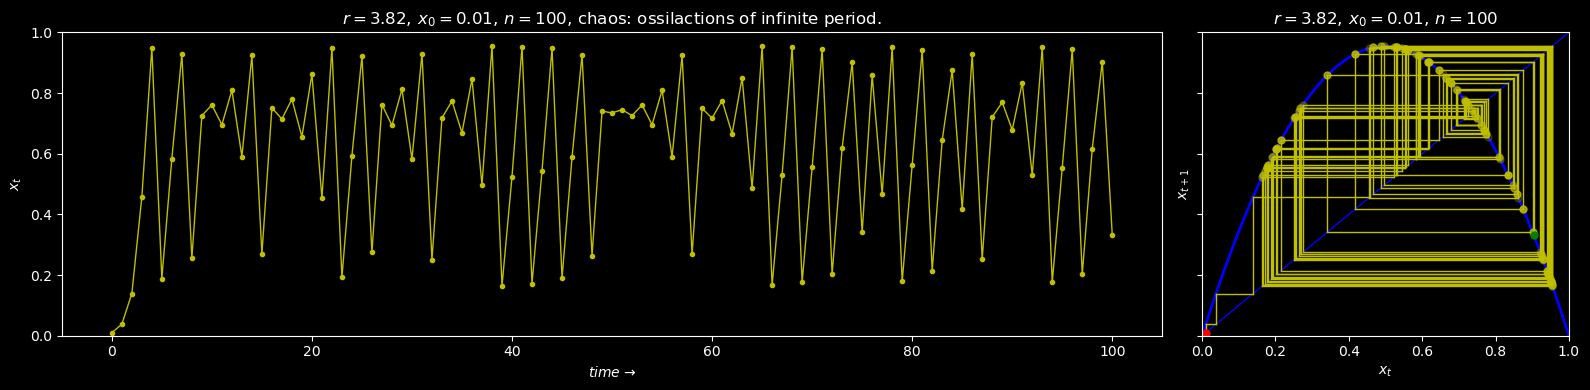

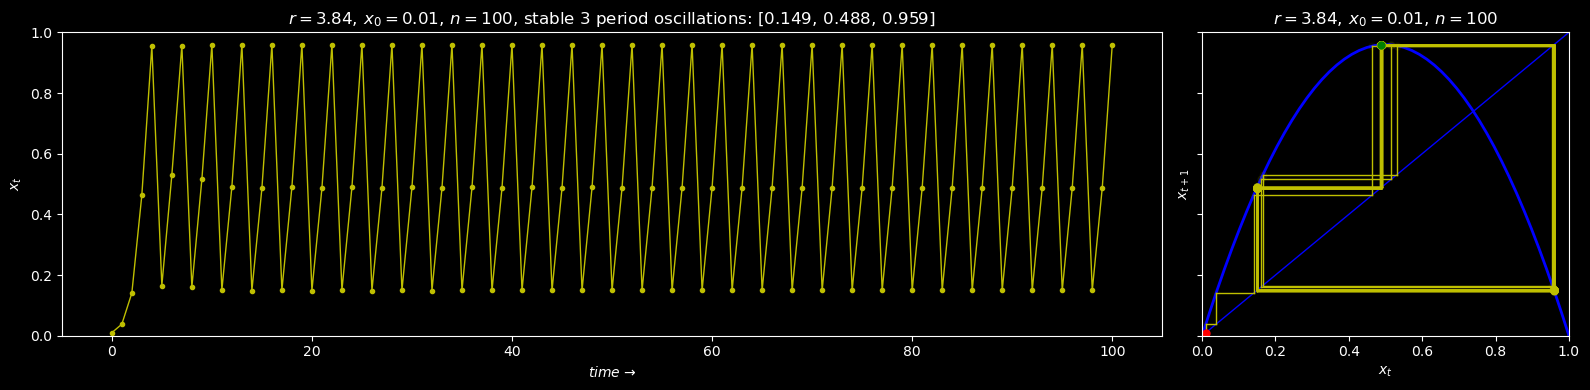

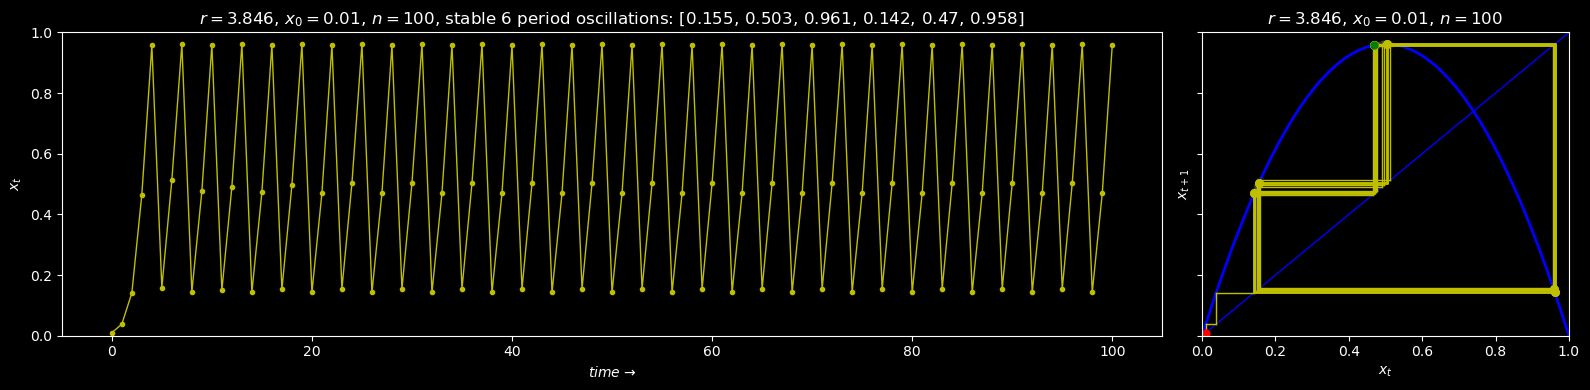

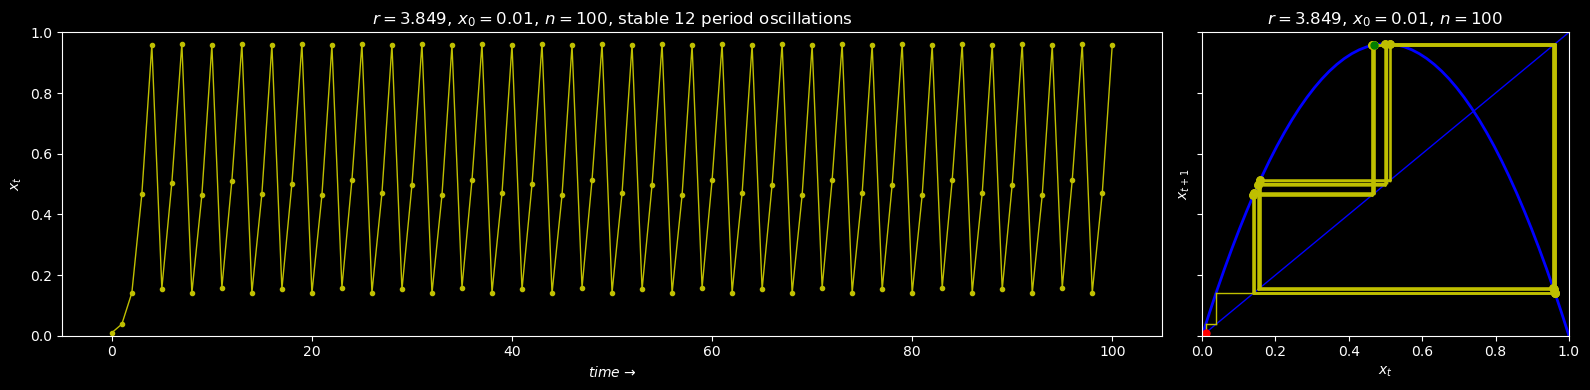

In [9]:
# x0s = np.linspace(0.1, 0.9, 9).tolist()

r = 0.9
plot_trajectory_and_cobweb(logistic_map, iterate(logistic_map, r, x0=0.5, n=30), fp=get_fixed_points(r))
# plot_trajectories_and_cobweb(logistic_map, iterate(logistic_map, r, x0s, n=30), fixed_points=get_fixed_points(r))

r = 1.9
plot_trajectory_and_cobweb(logistic_map, iterate(logistic_map, r, x0=0.01, n=40), fp=get_fixed_points(r))
# plot_trajectories_and_cobweb(logistic_map, iterate(logistic_map, r, x0=x0s, n=30), fixed_points=get_fixed_points(r))

r = 2.9
plot_trajectory_and_cobweb(logistic_map, iterate(logistic_map, r, x0=0.01, n=40), fp=get_fixed_points(r))
# plot_trajectories_and_cobweb(logistic_map, iterate(logistic_map, r, x0=x0s, n=40), fixed_points=get_fixed_points(r))

r = 3.0
plot_trajectory_and_cobweb(logistic_map, iterate(logistic_map, r, x0=0.01, n=40), fp=get_fixed_points(r))
# plot_trajectories_and_cobweb(logistic_map, iterate(logistic_map, r, x0=x0s, n=40), fixed_points=get_fixed_points(r))

r = 3.35
plot_trajectory_and_cobweb(logistic_map, iterate(logistic_map, r, x0=0.01, n=40), fp=get_fixed_points(r))
# plot_trajectories_and_cobweb(logistic_map, iterate(logistic_map, r, x0=x0s, n=40), fixed_points=get_fixed_points(r))

r = 3.53
plot_trajectory_and_cobweb(logistic_map, iterate(logistic_map, r, x0=0.01, n=40), fp=get_fixed_points(r))

r = 3.562
plot_trajectory_and_cobweb(logistic_map, iterate(logistic_map, r, x0=0.01, n=40), fp=get_fixed_points(r), labels=True)

r = 3.56485
plot_trajectory_and_cobweb(logistic_map, iterate(logistic_map, r, x0=0.01, n=40), fp=get_fixed_points(r), labels=True)

r = 3.569
plot_trajectory_and_cobweb(logistic_map, iterate(logistic_map, r, x0=0.01, n=100), fp=get_fixed_points(r))

r = 3.82
plot_trajectory_and_cobweb(logistic_map, iterate(logistic_map, r, x0=0.01, n=100), fp=get_fixed_points(r))

r = 3.84
plot_trajectory_and_cobweb(logistic_map, iterate(logistic_map, r, x0=0.01, n=100), fp=get_fixed_points(r))

r = 3.846
plot_trajectory_and_cobweb(logistic_map, iterate(logistic_map, r, x0=0.01, n=100), fp=get_fixed_points(r))

r = 3.849
plot_trajectory_and_cobweb(logistic_map, iterate(logistic_map, r, x0=0.01, n=100), fp=get_fixed_points(r))

### initial conditions

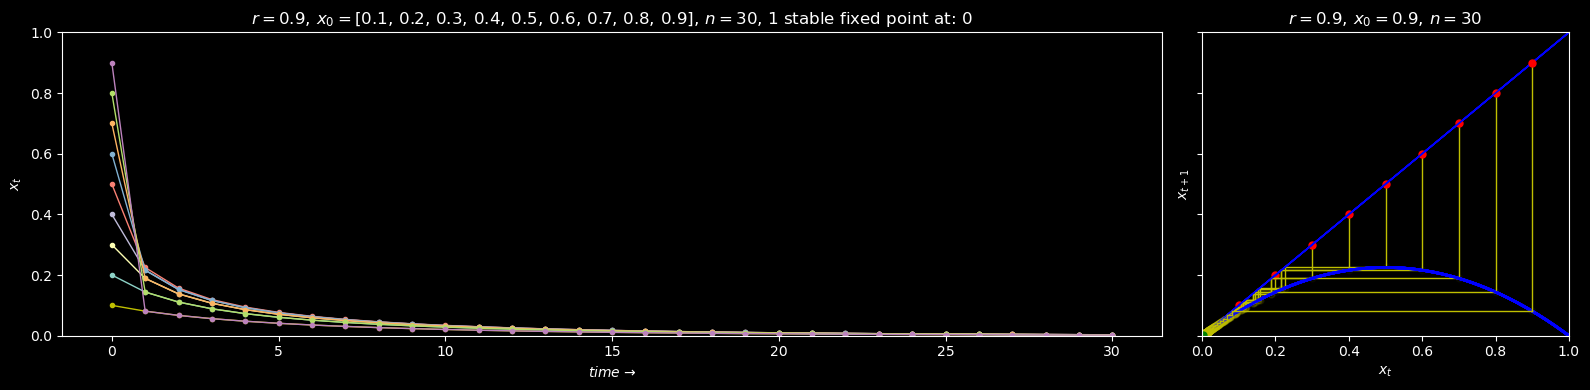

In [10]:
r=0.9
x0s = np.linspace(0.1, 0.9, 9).tolist()
n=30
trajectories = iterate(logistic_map, r, x0s, n=30)
fixed_points = get_fixed_points(r)
plot_trajectories_and_cobweb(logistic_map, trajectories, fixed_points)

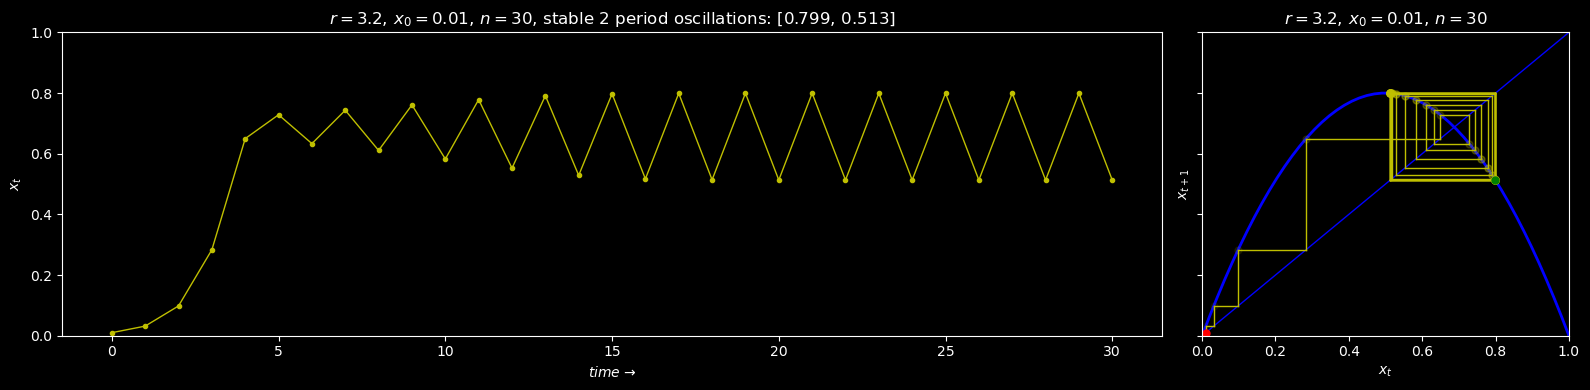

In [11]:
r = 3.2

fixed_points = get_fixed_points(r)
t = iterate(logistic_map, r, x0=0.01, n=30)
plot_trajectory_and_cobweb(logistic_map, t, fixed_points)

After a little transient, the values of x are periodic, with period 2. But what happens with other values of a? Here are a few results for this so-called “logistic map”:

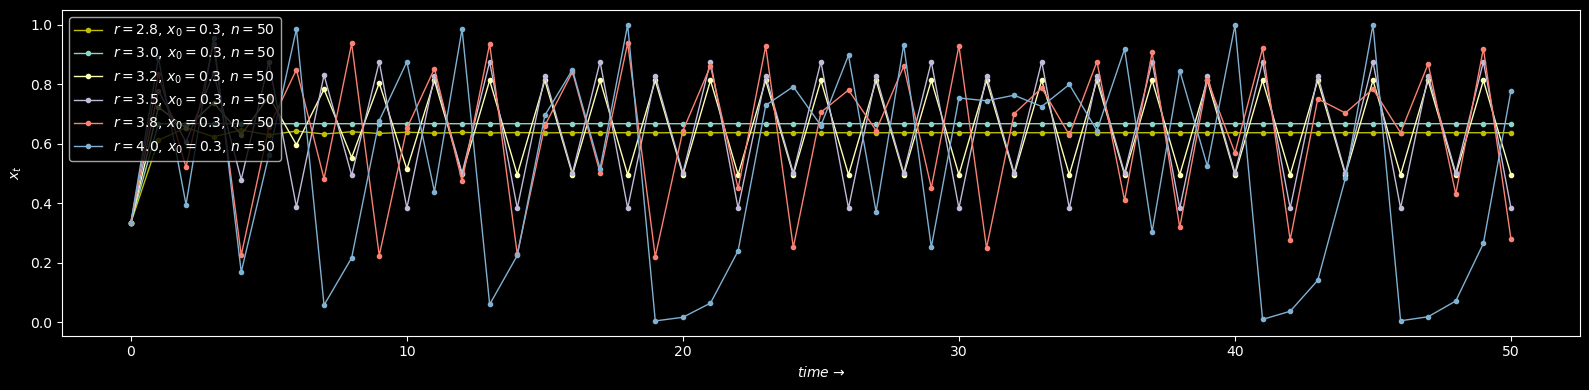

In [12]:
r_values = [2.75, 3.0, 3.25, 3.5, 3.75, 4.0]

trajectories = iterate(logistic_map, r=r_values, x0=1/3, n=50)
plot_trajectories(trajectories)

For small `a`, the values of `x` quickly go to a fixed point. For larger `a` they become periodic, first with period `2`, then `4`.

And finally, for larger a, the values start bouncing around seemingly randomly.

# Bifurcation diagram

Simulate the dynamic system for `10000` values of `r`, linearly spaced between `2.5` and `4.0`

In [13]:
n_steps= 10000

r = np.linspace(2.5, 4.0, n_steps)


# keep the last 100 iterations to display the bifurcation diagram
n = 1000
last = 100

# initialize system
x0 = 1e-5
x = x0 * np.ones(n_steps)

# initialize the lyapunov vector
lyapunov = np.zeros(n_steps)

Simulate the system and plot the bifurcation diagram. The simulation only involves the iterative evaluation of the `logistic_map()` function on our vector `x`. <br>Then, to display the bifurcation diagram, we draw one pixel per point `x(r)n` during the last `100` iterations

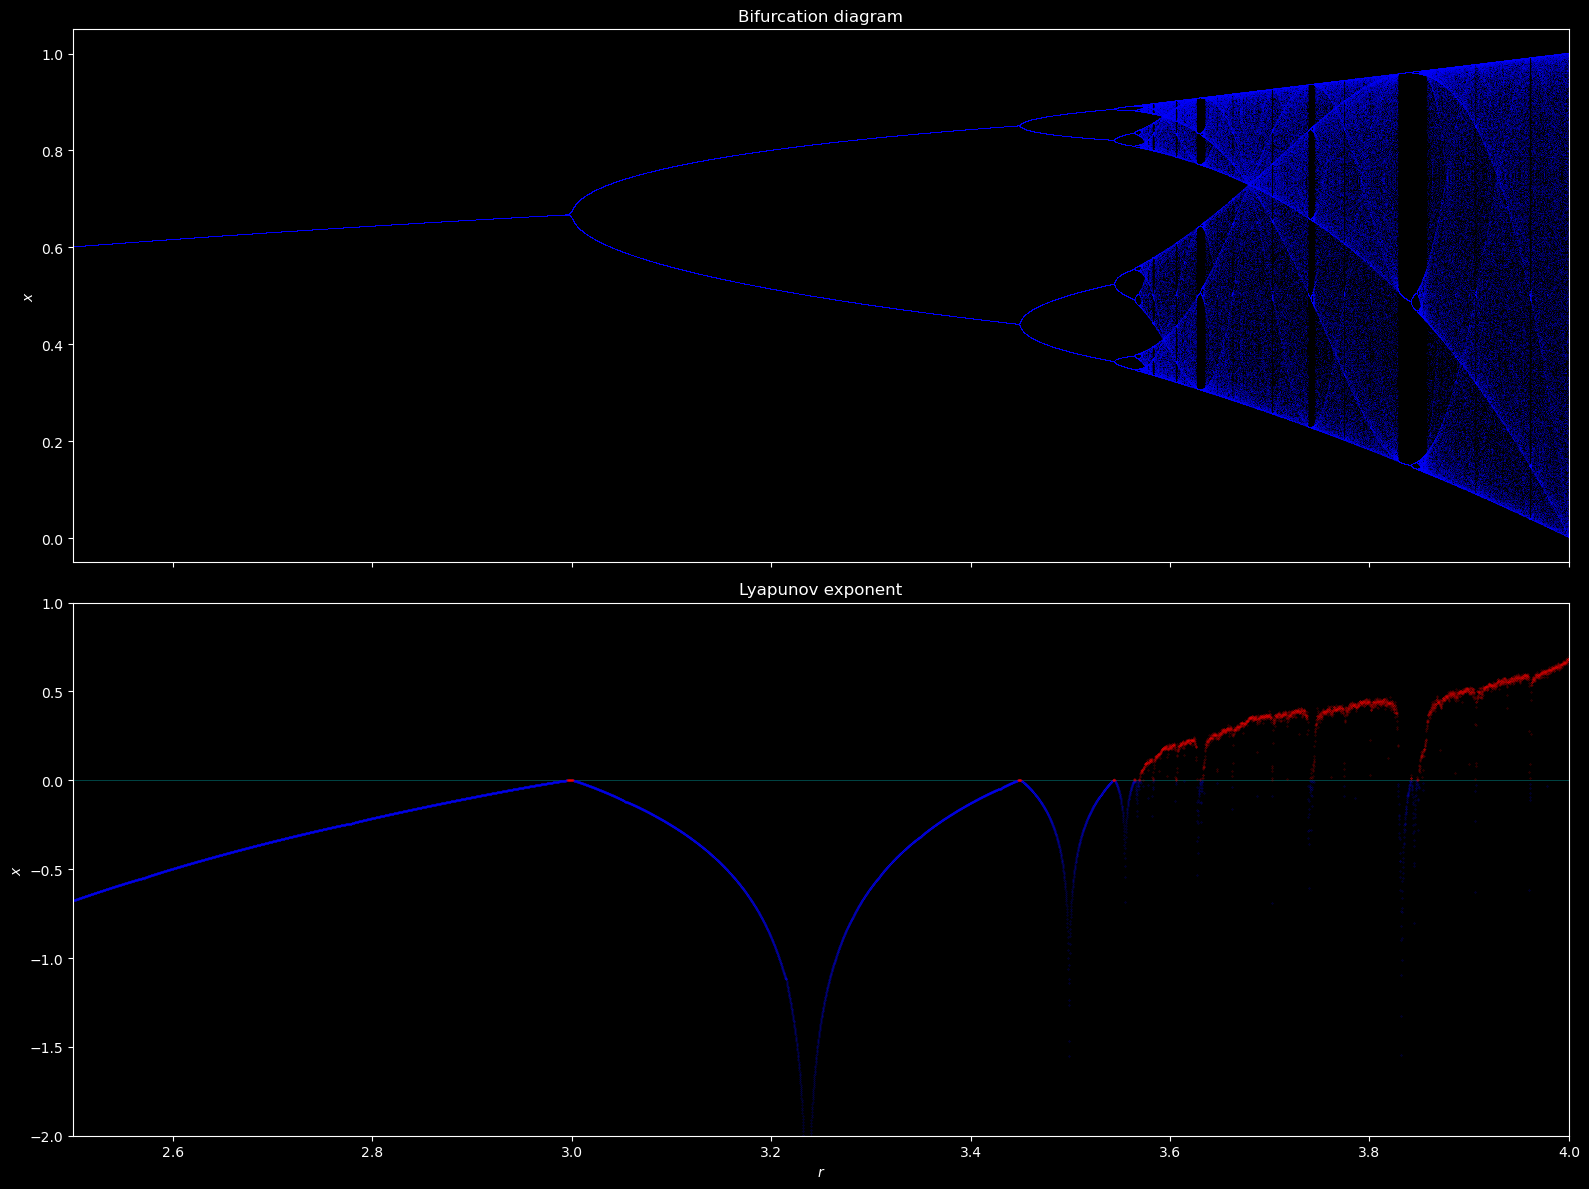

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharex=True)

for i in range(n):
    x = logistic_map(r, x)
    # compute the partial sum of the Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # display the bifurcation diagram.
    if i >= (n - last):
        ax1.plot(r, x, ',b', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")
ax1.set_ylabel(f'$x$')

# display the Lyapunov exponent.
# horizontal line.
ax2.axhline(0, color='c', lw=.5, alpha=.5)
# negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0], lyapunov[lyapunov < 0] / n, '.b', alpha=.5, ms=.5)
# positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0], lyapunov[lyapunov >= 0] / n, '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
ax2.set_xlabel(f'$r$')
ax2.set_ylabel(f'$x$')

plt.tight_layout()

In [15]:
lyapunov[lyapunov >= 0]

array([1.95756870e-03, 9.78599705e-02, 1.91961370e-01, ...,
       6.87365616e+02, 6.86278198e+02, 6.97164681e+02])